 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 05 : Dynamic Time Warping (DTW)  </b>


We expect you to code the dynamic time warping algorithm from scratch in this programming assignment. The skeleton code is provided for you to understand the algorithm. At the end of the assignment, you need to write an algorithm to perform an isolated digit recognition task using Dynamic Time Warping (DTW) codes. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<h4> <b> Part (a). Dynamic Time Warping(DTW): </b>  In this part you need to try and implement the basic sequence matching algorithm DTW. </h4>
<dt> <h4> Two sequences A and B can be compared using a euclidean distance
<center> $ A = (x_1, x_2, x_3, ..., x_M)$ </center> <br>
<center> $ B = (y_1, y_2, y_3, ..., y_N)$ </center> <br> </h4> </dt>
<dt> <h4> Now the distance is computed as </h4> </dt>
<center> $ D(A,B) = \frac{1}{N} \sum_1^N || x_n - y_n||$</center> </h4> </dt>
<dt> <h4> There are two main issues </h4> </dt>
<dd> <h4> 1. What if the sequences are not aligned in time ?</h4> </dt>
<dd> <h4> 2. What if the sequences have varying lengths ?</h4> </dt>
<dt> <h4> The non-linear alignment path produces a better similarity measure. </h4> </dt>

![picture](https://drive.google.com/uc?export=view&id=1XWTK0XUpDIuf-5nbe7pk6uPx29-22zF0)

<dt> <h4> <b> Algorithm </b> </h4> </dt>
<dt> <h4>  1. Compute distance matrix $D_{M\times N}$ between A and B </h4> </dt>
<dt> <h4>  2. Compute accumulated distance matrix $C_{M\times N}$ between A and B </h4> </dt>
<dd> <h4>  ~ Initialize: C(0,0) = D(0,0) </h4> </dd>
<dd> <h4>  ~ for i=1,2,..M and j=1,2,...N  <dd> <h4>  ~ Update C <dd> <h4> C(i,j) = D(i,j) + min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> <dd> <h4>  ~ Store the best Path <dd> <h4> P(i,j) = arg min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> </h4> </dd>
<dt> <h4>  3. C(M,N) gives the similarity measure </h4> </dt>
<dt> <h4>  4. Backtrack the best alignment path <br> <center> $ q_T^* = (M,N) \\ q_{t-1}^* = P(q_t^*) \qquad t = T,T-1,....1$ </center></h4> </dt>
<dt> <h4> <b> Programming question </b> </h4> </dt>
<dt> <h4>  1. Consider the following two sequences $A = [4,3,7,0,2,6,5]$, and $B = [3,7,1,6,1,5,4,4]$. Write a DTW algorithm to find the optimal similarity/distance between them. </h4> </dt>
<dd> <h4> - Compute the distance matrix between the two sequences </dd> </h4>
<dd> <h4> - Compute the accumulative distance matrix </dd> </h4>
<dd> <h4> - Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance </dd> </h4>
<dd> <h4> - Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes </dd> </h4>



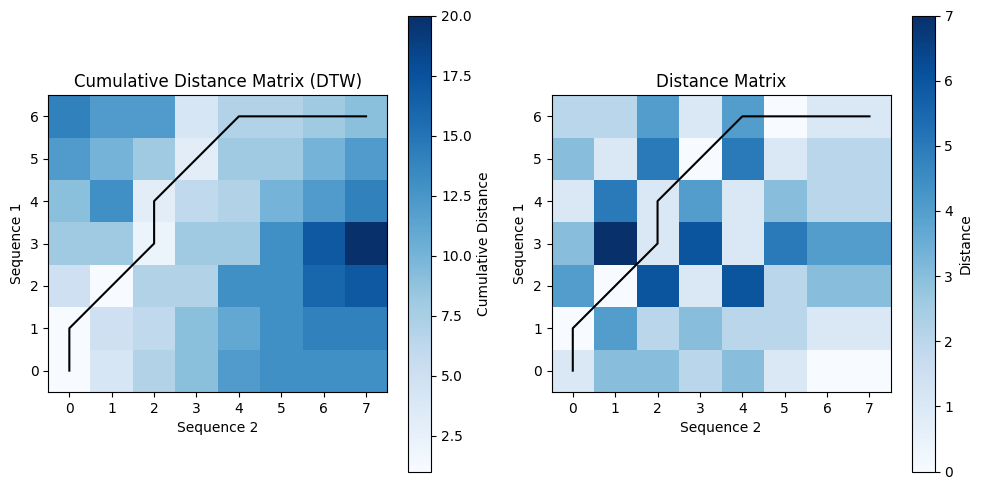

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two sequences
###########################################################
def DTW(sequence1,sequence2):
    #######################################################
    # Input  : Two sequences
    # Output : DTW path and optimal distance
    #######################################################



    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    DTW_cumulate_Matrix = np.zeros((len(sequence1), len(sequence2)))   #Cummulative distance matrix
    DTW_cumulate_Matrix[0, 0] = abs(sequence1[0] - sequence2[0])

    dist_matrix = np.zeros((len(sequence1), len(sequence2)))

    for i in range(len(sequence1)):
        for j in range(len(sequence2)):
          dist_matrix[i, j] = abs(sequence1[i] - sequence2[j])

    for i in range(1, len(sequence1)):
        DTW_cumulate_Matrix[i, 0] = DTW_cumulate_Matrix[i - 1, 0] + abs(sequence1[i] - sequence2[0])
    for j in range(1, len(sequence2)):
        DTW_cumulate_Matrix[0, j] = DTW_cumulate_Matrix[0, j - 1] + abs(sequence1[0] - sequence2[j])

    #Iterate through the sequence of points in sequences and compute the distance between the sequences.
    for i in range(1,len(sequence1),1): #you can start from 1
        for j in range(1,len(sequence2),1):
            current_distance = abs(sequence1[i] - sequence2[j])     #Compute the distance between the two points
            current_distance += min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1])
            DTW_cumulate_Matrix[i, j] = current_distance

    i = len(sequence1) - 1
    j = len(sequence2) - 1

    opt_distance = DTW_cumulate_Matrix[i][j]
    opt_path = []

    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################

    opt_path.append((i, j))
    while i!=0 and j!=0: #Start from the last point and backtrack
        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])
        t = DTW_cumulate_Matrix[i - 1, j]
        u = DTW_cumulate_Matrix[i-1, j - 1]
        v = DTW_cumulate_Matrix[i, j - 1]

        if(t <= u and t <= v):
          i = i - 1
        elif(u <= t and u <= v):
          j = j - 1
          i = i - 1
        else:
          j = j - 1
        #Store the required indexes to obtain the optimal path
        opt_path.append((i, j))

    while i != 0:
      i = i - 1
      opt_path.append((i, 0))
    while j != 0:
      j = j - 1
      opt_path.append((0, j))
    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################
    opt_path = opt_path[::-1]
    opt_path = np.array(opt_path).reshape((len(opt_path), 2))

    return opt_distance, opt_path, DTW_cumulate_Matrix, dist_matrix


def plotDTWpath(sequence1,sequence2):
    #######################################################
    # Inputs : sequence1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################
    #Obtain the optimal path using "DTW" function
    opt_distance, optimal_path, DTW_cumulative_Matrix, distance_matrix = DTW(sequence1, sequence2)

    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes
    # Plot the optimal path on cumulative distance matrix
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(DTW_cumulative_Matrix, origin='lower', cmap='Blues', interpolation='nearest')
    plt.title('Cumulative Distance Matrix (DTW)')
    plt.colorbar(label='Cumulative Distance')
    plt.plot(optimal_path[:, 1], optimal_path[:, 0], color='k')
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')

    plt.subplot(1, 2, 2)
    plt.imshow(distance_matrix, origin='lower', cmap='Blues', interpolation='nearest')
    plt.title('Distance Matrix')
    plt.colorbar(label='Distance')
    plt.plot(optimal_path[:, 1], optimal_path[:, 0], color='k')
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')

    plt.tight_layout()
    plt.show()
    #Compute distance and cumulative distance between the given templates



sequence1 = [4, 3, 7, 0, 2, 6, 5]
sequence2 = [3, 7, 1, 6, 1, 5, 4, 4]

#Plot the optimal path on distance and cumulative matrices and verify the DTW codes
plotDTWpath(sequence1, sequence2)

<b> Report your observations </b>

1. We can see that DTW find path with light color(lower cumulative distance)

2. In the distance matrix, it passes through most of the whites

3. The dp solution is slightly slow, can be optimised to be better.




<dt> <h4> <b> Part (b): </b> In this part of the assignment, we expect you to build the Isolated digit recognition system with the help of the above written DTW algorithm. </dt> </h4>

![picture](https://drive.google.com/uc?export=view&id=1nGtWwbDg8PJBNwck_dUt2mmsCBshrGYc)



<dt> <h4> 1. Record one repetition each of the digits zero, one, two, three, four, five, six, seven, eight, and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes. </dt> </h4>
<dt> <h4> 2. Record three further repetitions of the same digits (Isolated words) as test data. </dt> </h4>  
<dt> <h4> 3. The codes to compute the signal's templates (Mel Frequency Cepstral Coefficients) are provided. Please use them to obtain the templates of the speech signals. </dt> </h4>  
<dt> <h4> 4. Write an algorithm to perform isolated digit recognition with the help of the DTW codes. </dt> </h4>
<dt> <h4> 5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   </dt> </h4>
<dt> <h4> 6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. </dt> </h4>
<dt> <h4> 7. Create a confusion matrix and report the most confusing digits. </dt> </h4>


**Module to record the voice in online mode**

In [ ]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io.wavfile
import io
import os
from IPython.display import Audio

#### You can run this module in the loop to record more repetitions of the digits.
if os.path.isfile('recording.wav'):
    print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
else:
    print("Recording the digits")
    for i in range(10):
        for j in range(4):
            print("say now", i)
            wav = record(3.0) #It will record three seconds of your speech. You can change the duration.
            wav = wav.set_frame_rate(16000)
            sig=wav.get_array_of_samples()
            samples=np.array(sig).T.astype(np.float32)
            fp_arr = np.array(samples).T.astype(np.float32)
            fp_arr /= np.iinfo(sig.typecode).max
            scipy.io.wavfile.write('recording' + str(i) + str(j+1) + '.wav', 16000, fp_arr) #Please change the name.


rm: cannot remove 'recording.wav': No such file or directory
Recording the digits
say now 0


<IPython.core.display.Javascript object>

say now 0


<IPython.core.display.Javascript object>

say now 0


<IPython.core.display.Javascript object>

say now 0


<IPython.core.display.Javascript object>

say now 1


<IPython.core.display.Javascript object>

say now 1


<IPython.core.display.Javascript object>

say now 1


<IPython.core.display.Javascript object>

say now 1


<IPython.core.display.Javascript object>

say now 2


<IPython.core.display.Javascript object>

say now 2


<IPython.core.display.Javascript object>

say now 2


<IPython.core.display.Javascript object>

say now 2


<IPython.core.display.Javascript object>

say now 3


<IPython.core.display.Javascript object>

say now 3


<IPython.core.display.Javascript object>

say now 3


<IPython.core.display.Javascript object>

say now 3


<IPython.core.display.Javascript object>

say now 4


<IPython.core.display.Javascript object>

say now 4


<IPython.core.display.Javascript object>

say now 4


<IPython.core.display.Javascript object>

say now 4


<IPython.core.display.Javascript object>

say now 5


<IPython.core.display.Javascript object>

say now 5


<IPython.core.display.Javascript object>

say now 5


<IPython.core.display.Javascript object>

say now 5


<IPython.core.display.Javascript object>

say now 6


<IPython.core.display.Javascript object>

say now 6


<IPython.core.display.Javascript object>

say now 6


<IPython.core.display.Javascript object>

say now 6


<IPython.core.display.Javascript object>

say now 7


<IPython.core.display.Javascript object>

say now 7


<IPython.core.display.Javascript object>

say now 7


<IPython.core.display.Javascript object>

say now 7


<IPython.core.display.Javascript object>

say now 8


<IPython.core.display.Javascript object>

say now 8


<IPython.core.display.Javascript object>

say now 8


<IPython.core.display.Javascript object>

say now 8


<IPython.core.display.Javascript object>

say now 9


<IPython.core.display.Javascript object>

say now 9


<IPython.core.display.Javascript object>

say now 9


<IPython.core.display.Javascript object>

say now 9


<IPython.core.display.Javascript object>

In [ ]:
for i in range(1):
    for j in range(4):
      wn = Audio('recording' + str(i) + str(j + 1) + '.wav', autoplay=True)
      display(wn)

**Algorithm to perform isolated digit recognition**

In [ ]:
!pip -q install scipy
import scipy.io.wavfile as wav
!pip -q install python_speech_features
!pip -q install speechpy
from python_speech_features import mfcc
import speechpy

  Preparing metadata (setup.py) ... done


In [9]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
import seaborn as sns

###########################################################
#Function to obtain the optimal distance and path between two sequences
###########################################################
def vecDTW(sequence1,sequence2):
    #######################################################
    # Input  : Two sequences
    # Output : DTW path and optimal distance
    #######################################################





    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    dist_matrix = np.zeros((sequence1.shape[0], sequence2.shape[0]))
    for i in range(sequence1.shape[0]):
        for j in range(sequence2.shape[0]):
            dist_matrix[i, j] = np.linalg.norm(sequence1[i] - sequence2[j], 1)

    DTW_cumulate_Matrix = np.zeros((sequence1.shape[0], sequence2.shape[0]))  #Cummulative distance matrix
    DTW_cumulate_Matrix[0, 0] = dist_matrix[0, 0]

    for i in range(1, sequence1.shape[0]):
        DTW_cumulate_Matrix[i, 0] = DTW_cumulate_Matrix[i - 1, 0] + dist_matrix[i, 0]
    for j in range(1, sequence2.shape[0]):
        DTW_cumulate_Matrix[0, j] = DTW_cumulate_Matrix[0, j - 1] + dist_matrix[0, j]

    #Iterate through the sequence of points in sequences and compute the distance between the sequences.
    for i in range(1, sequence1.shape[0], 1): #you can start from 1
        for j in range(1, sequence2.shape[0],1):
            DTW_cumulate_Matrix[i, j] = dist_matrix[i, j] + min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1])

    i = sequence1.shape[0] - 1
    j = sequence2.shape[0] - 1

    opt_distance = DTW_cumulate_Matrix[i][j]
    opt_path = []

    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################

    opt_path.append((i, j))
    while i!=0 and j!=0: #Start from the last point and backtrack
        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])
        t = DTW_cumulate_Matrix[i - 1, j]
        u = DTW_cumulate_Matrix[i-1, j - 1]
        v = DTW_cumulate_Matrix[i, j - 1]

        if(t <= u and t <= v):
          i = i - 1
        elif(u <= t and u <= v):
          j = j - 1
          i = i - 1
        else:
          j = j - 1
        #Store the required indexes to obtain the optimal path
        opt_path.append((i, j))

    while i != 0:
      i = i - 1
      opt_path.append((i, 0))
    while j != 0:
      j = j - 1
      opt_path.append((0, j))
    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################
    opt_path = opt_path[::-1]
    opt_path = np.array(opt_path).reshape((len(opt_path), 2))

    return opt_distance, opt_path, DTW_cumulate_Matrix, dist_matrix


def vecplotDTWpath(sequence1,sequence2):
    #######################################################
    # Inputs : sequence1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################
    #Obtain the optimal path using "DTW" function
    opt_distance, optimal_path, DTW_cumulative_Matrix, distance_matrix = vecDTW(sequence1, sequence2)

    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes
    # Plot the optimal path on cumulative distance matrix
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(DTW_cumulative_Matrix, origin='lower', cmap='YlGnBu', interpolation='nearest')
    plt.title('Cumulative Distance Matrix (DTW)')
    plt.colorbar(label='Cumulative Distance')
    plt.plot(optimal_path[:, 1], optimal_path[:, 0], color='k')
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')

    plt.subplot(1, 2, 2)
    plt.imshow(distance_matrix, origin='lower', cmap='YlGnBu', interpolation='nearest')
    plt.title('Distance Matrix')
    plt.colorbar(label='Distance')
    plt.plot(optimal_path[:, 1], optimal_path[:, 0], color='k')
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')

    plt.tight_layout()
    plt.show()
    #Compute distance and cumulative distance between the given templates




**Plot the optimal DTW path**

(281, 13) (299, 13)


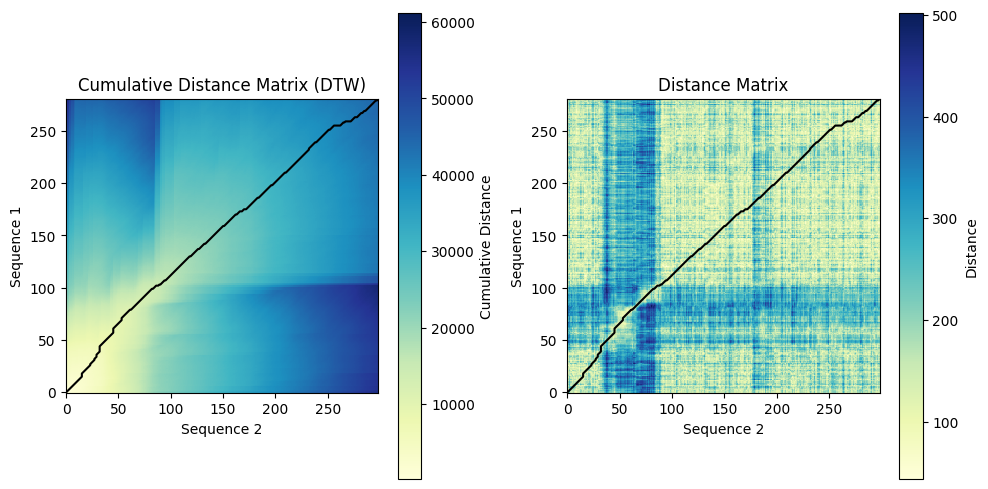

In [ ]:
#Same digit
(rate,sig) = wav.read('recording01.wav')
sig=sig-np.mean(sig)
mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
seq1 = np.array(mfcc_feat_cmvn)
(rate,sig) = wav.read('recording02.wav')
sig=sig-np.mean(sig)
mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
seq2 = np.array(mfcc_feat_cmvn)
print(seq1.shape, seq2.shape)
vecplotDTWpath(seq1, seq2)

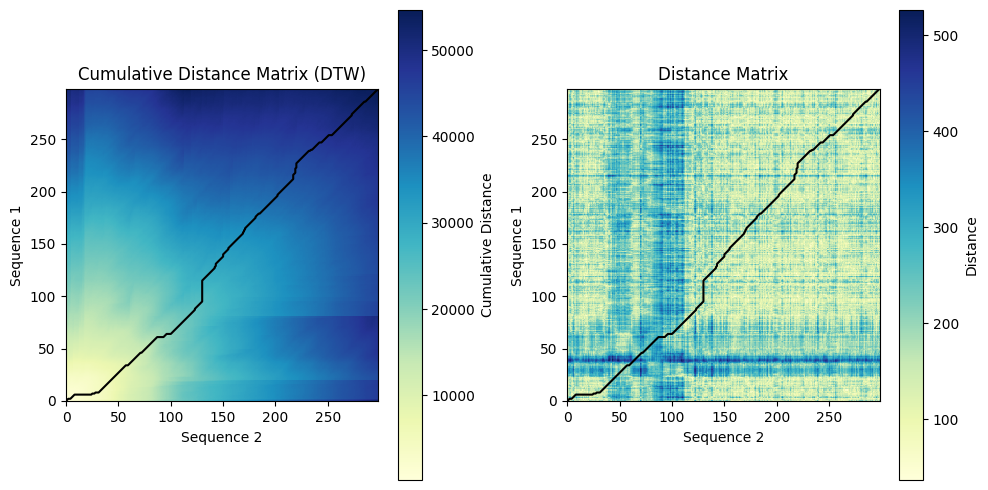

In [ ]:
#Different digits
(rate,sig) = wav.read('recording11.wav')
sig=sig-np.mean(sig)
mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
seq1 = np.array(mfcc_feat_cmvn)
(rate,sig) = wav.read('recording91.wav')
sig=sig-np.mean(sig)
mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
seq2 = np.array(mfcc_feat_cmvn)
vecplotDTWpath(seq1, seq2)

**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

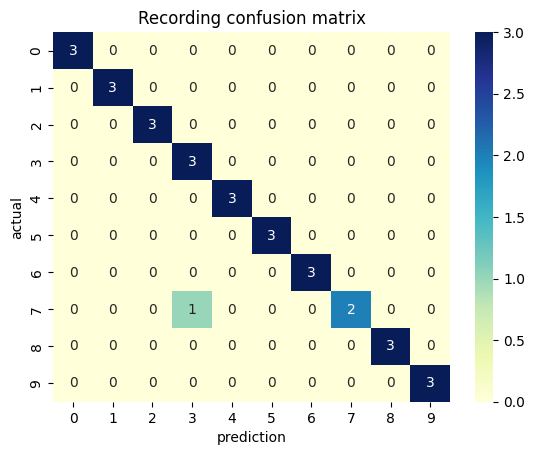

Accuracy =  96.66666666666667 %


In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
import seaborn as sns

traindigits = []
for i in range(10):
    (rate,sig) = wav.read('recording' + str(i) + '1.wav')
    sig=sig-np.mean(sig)
    mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
    mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
    seq1 = np.array(mfcc_feat_cmvn)
    traindigits.append(seq1)
confusion_matrix = np.zeros((10, 10))
for i in range(10):
    for j in range(2, 5):
        bstdig = -1
        opt_dist = -1
        (rate,sig) = wav.read('recording' + str(i) + str(j) + '.wav')
        sig=sig-np.mean(sig)
        mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
        mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
        seq1 = np.array(mfcc_feat_cmvn)
        for k in range(10):
            chk_dist, _, _a, _b = vecDTW(seq1, traindigits[k])
            if(bstdig == -1):
                bstdig = k
                opt_dist = chk_dist
            if(chk_dist < opt_dist):
                opt_dist = chk_dist
                bstdig = k
        confusion_matrix[i, bstdig] += 1
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap = 'YlGnBu')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title("Recording confusion matrix")
plt.show()
print("Accuracy = ", np.sum(np.eye(10) * confusion_matrix) / np.sum(confusion_matrix) * 100, "%")

<b> Report your observations </b>

1. We can see that isolated digit recognition works incredibly well, only failing to classify one $7$ as a $3$ and correctly classifying every other digit.

2. This depends on the speaker. My speech was relatively same for all the digits.

3. For same digit, we can see lighter shade in the DTW plot in top right corner, but for different digit, it is darker despite the path. It is relatively straight.




<dt> <h4> <b> Part (c): </b> In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  </dt> </h4>

[link to TDIGITS data](https://drive.google.com/drive/folders/1oV3jrUiug0-SwWLOdLtbXA6hzqYYIlI7?usp=sharing)


<dt> <h4> 1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy. </dt> </h4>
<dt> <h4> 2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. </dt> </h4>
<dt> <h4> 3. Please report some of the changes to improve the system performance. </dt> </h4>

In [4]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
import scipy.io.wavfile as wav
!pip -q install python_speech_features
!pip -q install speechpy
from python_speech_features import mfcc
import speechpy
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
#Download the data from the given link and keep it in the following location
mypath = "/content/drive/MyDrive/MultiSpeakerDigitData_modified"

Mounted at /content/drive


In [7]:
#Performance evaluation of Isolated digit recognition system on TDIGITS data
train = []
test = []
names = ['yweweler', 'theo', 'nicolas', 'jackson']
for i in range(4):
  name = names[i]
  tr_append = []
  te_append = []
  for digit in range(10):
    (rate,sig) = wav.read(mypath + '/' + name + '/' + str(digit) + '_' + name + '_0.wav')
    sig=sig-np.mean(sig)
    mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
    mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
    seq1 = np.array(mfcc_feat_cmvn)
    tr_append.append(seq1)
    te_dig_app = []
    for i in range(1, 50):
      (rate,sig) = wav.read(mypath + '/' + name + '/' + str(digit) + '_' + name + '_' + str(i) + '.wav')
      sig=sig-np.mean(sig)
      mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
      mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
      seq1 = np.array(mfcc_feat_cmvn)
      te_dig_app.append(seq1)
    te_append.append(te_dig_app)
  test.append(te_append)
  train.append(tr_append)

yweweler


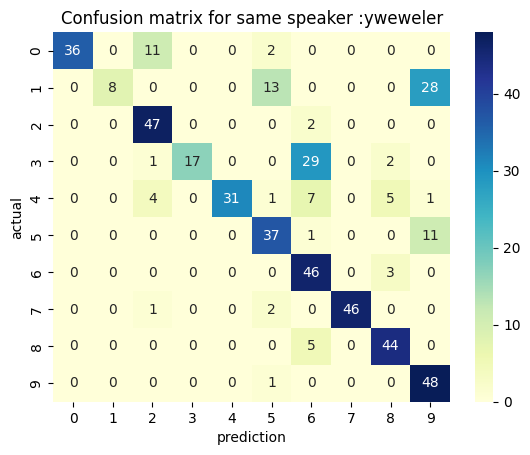

Accuracy =  73.46938775510205 %
theo


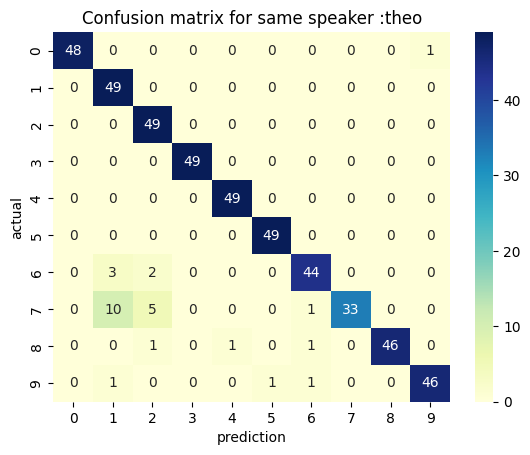

Accuracy =  94.28571428571428 %
nicolas


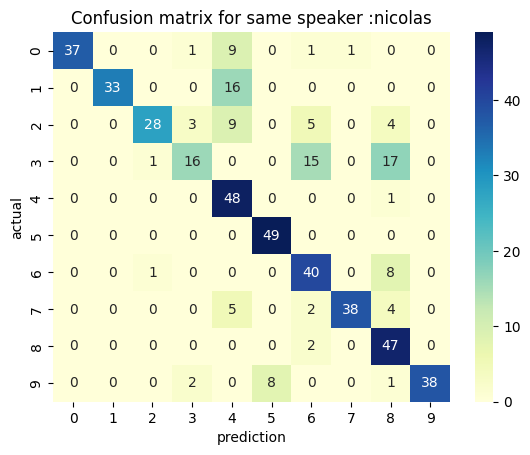

Accuracy =  76.32653061224491 %
jackson


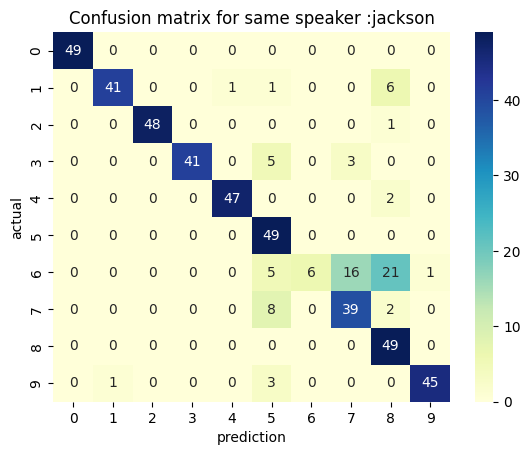

Accuracy =  84.48979591836735 %


In [10]:
import seaborn as sns
for idx in range(4):
    name = names[idx]
    confusion_matrix = np.zeros((10, 10))
    for i in range(10):
        for j in range(49):
            best_match = -1
            opt_dist = -1
            for k in range(10):
                dist, _, _a, _b = vecDTW(test[idx][i][j], train[idx][k])
                if(best_match == -1):
                    best_match = k
                    opt_dist = dist
                if(dist < opt_dist):
                    opt_dist = dist
                    best_match = k
            confusion_matrix[i, best_match] += 1
    print(name)
    sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap = 'YlGnBu')
    plt.xlabel('prediction')
    plt.ylabel('actual')
    plt.title("Confusion matrix for same speaker :" + name)
    plt.show()
    print("Accuracy = ", np.sum(np.eye(10) * confusion_matrix) / np.sum(confusion_matrix) * 100, "%")


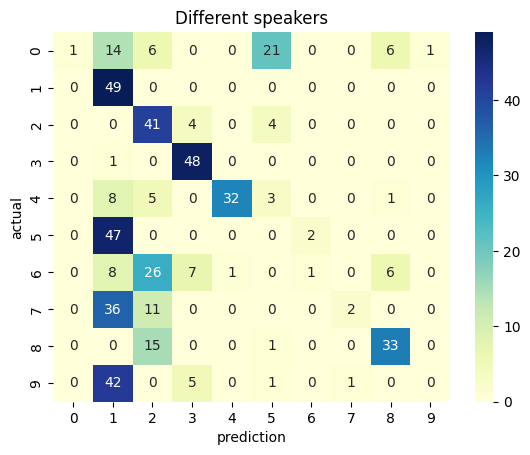

Accuracy =  42.244897959183675 %


In [12]:
#For reference and test coming from different speakers.
# !pip install seaborn
import seaborn as sns
confusion_matrix = np.zeros((10, 10))
for i in range(10):
  for j in range(49):
    best_match = -1
    opt_dist = -1
    for k in range(10):
      dist, _, _a, _b = vecDTW(test[0][i][j], train[1][k])
      if(best_match == -1):
        best_match = k
        opt_dist = dist
      if(dist < opt_dist):
        opt_dist = dist
        best_match = k
    confusion_matrix[i, best_match] += 1


sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap = 'YlGnBu')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('Different speakers')
plt.show()

print("Accuracy = ", np.sum(np.eye(10) * confusion_matrix) / np.sum(confusion_matrix) * 100, "%")

<b> Report your observations </b>

1. Even for same speaker, we cam see that the performance greatly varies with the train/test data. The highest accuracy is $94$%, but the lowest is a mere $73$%

2. For different speaker, the accuracy greatly drops. The accuracy varies from $20$% to $40$%, much less than earlier.

3. To improve performance, we can do many things such as
 - Use more train points to classify the data
 - Use an approach which can learn the variations in voice
 - Record more features in the digit recordings
 - Use a word dictionary
